<a href="https://colab.research.google.com/github/bigdatakang0000/START/blob/main/%EC%A1%B0%EB%B3%842_2)_%EB%84%B7%ED%94%8C%EB%A6%AD%EC%8A%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#로지스틱 회귀분석

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/영화에 진심.CSV", encoding = "cp949")
df

,영화제목,천만여부,연도,누적관객수,매출액,스크린수,제작비,넷플릭스,배급사,네이버평점,...,연령가,시리즈여부,상영횟수,감독,러닝타임,수상여부,원작여부,주연배우수,주연배우,대표배우필모그래피
0,명량,1,2014,17615437,1357,1587,190,0,CJ ENM,8,...,1,1,188668,김한민,128,1,1,3,최민식,32
1,극한직업,1,2019,16265618,1396,1978,95,0,CJ ENM,9,...,1,0,292584,이병헌,111,1,0,5,류승룡,36
2,신과함께 - 죄와 벌,1,2017,14411502,1156,1912,200,0,㈜롯데ENT,8,...,0,1,213262,김용화,139,1,1,5,하정우,44
3,국제시장,1,2014,14263203,1109,966,180,0,CJ ENM,9,...,0,0,212683,윤제균,126,1,0,4,황정민,45
4,아바타,1,2009,14003138,1284,912,2931,1,20세기폭스,9,...,0,1,177773,제임스 카메론,162,1,0,7,아바타,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,분노의 질주:홉스앤쇼,0,2019,3657536,322,1311,2466,0,유니버셜픽쳐스,8,...,0,1,94896,데이비드 리치,136,1,0,4,드웨인 존슨,33
96,남자가 사랑할때,0,2014,1979311,145,531,31,1,㈜NEW,8,...,1,0,41123,한동욱,120,0,0,2,황정민,45
97,데드풀,0,2016,3317196,276,1036,715,0,월트디즈니컴퍼니코리아,8,...,1,1,82521,팀 밀러,106,1,1,1,라이언 레이놀즈,38
98,나우유씨미2,0,2016,3100113,251,1200,1109,1,㈜롯데ENT,8,...,0,1,56981,존M.추,129,0,0,5,제시 아이젠버그,24


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   영화제목       100 non-null    object
 1   천만여부       100 non-null    int64 
 2   연도         100 non-null    int64 
 3   누적관객수      100 non-null    int64 
 4   매출액        100 non-null    int64 
 5   스크린수       100 non-null    int64 
 6   제작비        100 non-null    int64 
 7   넷플릭스       100 non-null    int64 
 8   배급사        100 non-null    object
 9   네이버평점      100 non-null    int64 
 10  국-내외       100 non-null    int64 
 11  영화분류       100 non-null    object
 12  개봉월        100 non-null    int64 
 13  연령가        100 non-null    int64 
 14  시리즈여부      100 non-null    int64 
 15  상영횟수       100 non-null    int64 
 16  감독         100 non-null    object
 17  러닝타임       100 non-null    int64 
 18  수상여부       100 non-null    int64 
 19  원작여부       100 non-null    int64 
 20  주연배우수      100 non-null    int64 

In [ ]:
df.isnull().sum()

영화제목         0
천만여부         0
연도           0
누적관객수        0
매출액          0
스크린수         0
제작비          0
넷플릭스         0
배급사          0
네이버평점        0
국-내외         0
영화분류         0
개봉월          0
연령가          0
시리즈여부        0
상영횟수         0
감독           0
러닝타임         0
수상여부         0
원작여부         0
주연배우수        0
주연배우         0
대표배우필모그래피    0
dtype: int64

In [ ]:
df.describe()

,천만여부,연도,누적관객수,매출액,스크린수,제작비,넷플릭스,네이버평점,국-내외,개봉월,연령가,시리즈여부,상영횟수,러닝타임,수상여부,원작여부,주연배우수,대표배우필모그래피
count,100.000000,100.00000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.280000,2016.66000,6.448725e+06,504.490000,1276.050000,541.430000,0.610000,7.99000,0.240000,6.530000,0.610000,0.310000,126418.170000,126.040000,0.720000,0.420000,4.390000,35.170000
std,0.451261,3.80648,4.548541e+06,367.626306,585.989268,925.520124,0.490207,0.87033,0.429235,3.391776,0.490207,0.464823,71473.416583,15.169027,0.451261,0.496045,3.100652,14.957215
min,0.000000,2003.00000,4.073230e+05,32.000000,83.000000,5.000000,0.000000,6.00000,0.000000,1.000000,0.000000,0.000000,14276.000000,95.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,2015.00000,2.406176e+06,191.250000,920.250000,70.000000,0.000000,8.00000,0.000000,4.000000,0.000000,0.000000,68485.500000,115.000000,0.000000,0.000000,3.000000,21.750000
50%,0.000000,2017.00000,5.357660e+06,423.000000,1205.000000,116.500000,1.000000,8.00000,0.000000,7.000000,1.000000,0.000000,118857.000000,126.000000,1.000000,0.000000,4.000000,40.000000
75%,1.000000,2019.00000,1.035607e+07,819.750000,1607.250000,242.500000,1.000000,9.00000,0.000000,9.000000,1.000000,1.000000,172018.500000,135.000000,1.000000,1.000000,5.000000,45.000000
max,1.000000,2022.00000,1.761544e+07,1396.000000,2948.000000,4228.000000,1.000000,9.00000,1.000000,12.000000,1.000000,1.000000,355767.000000,181.000000,1.000000,1.000000,22.000000,79.000000


In [ ]:
df.columns

Index(['영화제목', '천만여부', '연도', '누적관객수', '매출액', '스크린수', '제작비', '넷플릭스', '배급사',
       '네이버평점', '국-내외', '영화분류', '개봉월', '연령가', '시리즈여부', '상영횟수', '감독', '러닝타임',
       '수상여부', '원작여부', '주연배우수', '주연배우', '대표배우필모그래피'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

X = df[['누적관객수','매출액','스크린수','러닝타임','주연배우수']]
Y = df["넷플릭스"]

#데이터 분할(train, test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=0)

#scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)

#오버 샘플링
smote = SMOTE(random_state=0)
X_train_over, Y_train_over = smote.fit_resample(X_train,Y_train)

[[-0.21972519 -0.0899368   0.35314602 -0.16465017  0.23065784]
 [-1.11277009 -1.02386501 -0.21058168  0.30992972 -0.75787577]
 [-0.90223401 -0.75943955 -0.0239421  -0.84262143  0.88968025]
 [-1.24588956 -1.21515151 -1.2180545  -0.23244729 -0.75787577]
 [ 0.38987689 -0.90290443 -0.37246295 -0.02905591 -0.42836456]
 [ 0.94010565  1.00433449 -0.30771044 -1.18160707 -0.75787577]
 [ 1.25955312 -0.87477406 -2.02174737  1.32688663 -0.42836456]
 [-1.2390248  -1.2067124  -0.83906189 -1.79178121 -0.75787577]
 [-0.59594494 -0.4950141   0.25792175 -1.04601281 -0.42836456]
 [-0.28912682 -0.15463665  0.92830064 -0.77482431  0.23065784]
 [ 2.26001076  2.61339152  1.53583151 -0.97821569  0.23065784]
 [-0.16870066 -0.06461947  0.26934866 -0.70702718  0.88968025]
 [-0.76640767 -0.73693526  0.20269167  0.44552398 -0.09885336]
 [-1.01478464 -0.97885642 -1.18186928 -1.04601281 -0.42836456]
 [ 1.75917573  2.2983314  -0.49435002  2.47943778  0.88968025]
 [ 1.38278641  0.78210459 -2.05221914 -0.43583867 -0.09

In [ ]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(C = 1, random_state = 0)

logit.fit(X_train_over, Y_train_over)
Y_pred = logit.predict(X_test)

#Y_pred
print("accuracy : {:.3f}".format(logit.score(X_train_over, Y_train_over)))

from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))
print(logit.intercept_)
print(logit.coef_)


accuracy : 0.702
              precision    recall  f1-score   support

           0       0.56      0.82      0.67        11
           1       0.86      0.63      0.73        19

    accuracy                           0.70        30
   macro avg       0.71      0.72      0.70        30
weighted avg       0.75      0.70      0.71        30

[0.02498533]
[[-0.58306446 -0.21099686  0.18842038 -0.22587712 -0.17719195]]


#K-NN

In [ ]:
df

,영화제목,천만여부,연도,누적관객수,매출액,스크린수,제작비,넷플릭스,배급사,네이버평점,...,연령가,시리즈여부,상영횟수,감독,러닝타임,수상여부,원작여부,주연배우수,주연배우,대표배우필모그래피
0,명량,1,2014,17615437,1357,1587,190,0,CJ ENM,8,...,1,1,188668,김한민,128,1,1,3,최민식,32
1,극한직업,1,2019,16265618,1396,1978,95,0,CJ ENM,9,...,1,0,292584,이병헌,111,1,0,5,류승룡,36
2,신과함께 - 죄와 벌,1,2017,14411502,1156,1912,200,0,㈜롯데ENT,8,...,0,1,213262,김용화,139,1,1,5,하정우,44
3,국제시장,1,2014,14263203,1109,966,180,0,CJ ENM,9,...,0,0,212683,윤제균,126,1,0,4,황정민,45
4,아바타,1,2009,14003138,1284,912,2931,1,20세기폭스,9,...,0,1,177773,제임스 카메론,162,1,0,7,아바타,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,분노의 질주:홉스앤쇼,0,2019,3657536,322,1311,2466,0,유니버셜픽쳐스,8,...,0,1,94896,데이비드 리치,136,1,0,4,드웨인 존슨,33
96,남자가 사랑할때,0,2014,1979311,145,531,31,1,㈜NEW,8,...,1,0,41123,한동욱,120,0,0,2,황정민,45
97,데드풀,0,2016,3317196,276,1036,715,0,월트디즈니컴퍼니코리아,8,...,1,1,82521,팀 밀러,106,1,1,1,라이언 레이놀즈,38
98,나우유씨미2,0,2016,3100113,251,1200,1109,1,㈜롯데ENT,8,...,0,1,56981,존M.추,129,0,0,5,제시 아이젠버그,24


In [ ]:
#classification

X = df[['누적관객수','매출액','스크린수','러닝타임','주연배우수']]
Y = df["넷플릭스"]


X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

scaler = StandardScaler(). fit(X_train, Y_train)
X_test = scaler. transform(X_test)
X_train = scaler. transform(X_train)

X_train, Y_train = SMOTE(random_state=0). fit_resample(X_train, Y_train)

from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=9, metric="euclidean")

knn_model.fit(X_train, Y_train)
Y_pred = knn_model.predict(X_test)
print("accuracy : {:.3f}".format(knn_model.score(X_train, Y_train)))
print(classification_report(Y_pred, Y_test))

accuracy : 0.750
              precision    recall  f1-score   support

           0       0.64      0.47      0.54        15
           1       0.58      0.73      0.65        15

    accuracy                           0.60        30
   macro avg       0.61      0.60      0.59        30
weighted avg       0.61      0.60      0.59        30



#의사결정 나무

In [ ]:
X = df[['누적관객수','매출액','스크린수','러닝타임','주연배우수']]
Y = df["넷플릭스"]


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

smote = SMOTE(random_state=0)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(random_state = 0, max_depth = 3)
DT_model.fit(X_train, Y_train)
Y_pred = DT_model.predict(X_test)
print("accuracy : {:.3f}".format(DT_model.score(X_train, Y_train)))
print(classification_report(Y_test, Y_pred))

accuracy : 0.833
              precision    recall  f1-score   support

           0       0.50      0.45      0.48        11
           1       0.70      0.74      0.72        19

    accuracy                           0.63        30
   macro avg       0.60      0.60      0.60        30
weighted avg       0.63      0.63      0.63        30



In [ ]:
feature_name = X.columns
feature_importance =DT_model.feature_importances_
sorted(zip(feature_importance, feature_name), reverse = True)

[(0.4325018832675445, '러닝타임'),
 (0.35341067285382827, '누적관객수'),
 (0.19492933980172955, '주연배우수'),
 (0.01915810407689761, '매출액'),
 (0.0, '스크린수')]

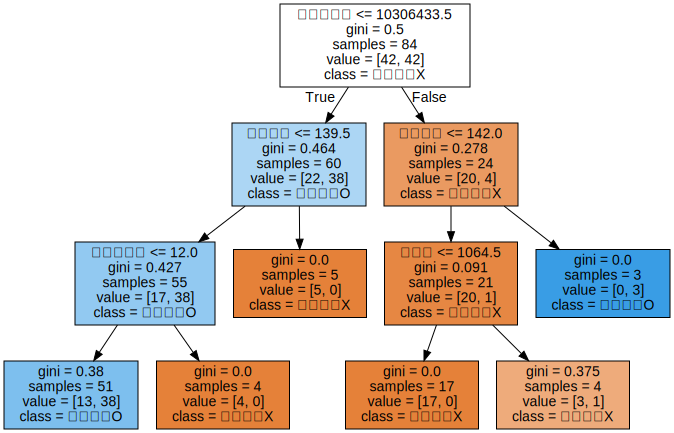

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

#파일생성
export_graphviz(DT_model, out_file="tree.dot", class_names=["넷플릭스X","넷플릭스O"],
                feature_names = feature_name, impurity=True, filled = True)


#파일열기
with open("tree.dot", encoding="utf-8") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)


#SVM

In [ ]:
X = df[['누적관객수','매출액','스크린수','러닝타임','주연배우수']]
Y = df["넷플릭스"]


X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

smote = SMOTE(random_state=0)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

from sklearn.svm import SVC 

SVC_model = SVC(C=1, gamma=1, random_state=0)
SVC_model.fit(X_train, Y_train)
Y_pred =SVC_model.predict(X_test)
print("accuracy : {:.3f}".format(SVC_model.score(X_train,Y_train)))
print(classification_report(Y_test,Y_pred))


accuracy : 1.000
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.63      1.00      0.78        19

    accuracy                           0.63        30
   macro avg       0.32      0.50      0.39        30
weighted avg       0.40      0.63      0.49        30



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#나이브 베이즈

In [ ]:
X = df[['누적관객수','매출액','스크린수','러닝타임','주연배우수']]
Y = df["넷플릭스"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

smote = SMOTE(random_state=0)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

from sklearn.naive_bayes import GaussianNB

NB_model = GaussianNB(var_smoothing = 0) 
NB_model.fit(X_train, Y_train)
Y_pred =NB_model.predict(X_test)
print("accuracy : {:.3f}".format(NB_model.score(X_train,Y_train)))
print(classification_report(Y_test, Y_pred))

accuracy : 0.762
              precision    recall  f1-score   support

           0       0.58      0.64      0.61        11
           1       0.78      0.74      0.76        19

    accuracy                           0.70        30
   macro avg       0.68      0.69      0.68        30
weighted avg       0.71      0.70      0.70        30



#인공신경망

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

In [ ]:
X = df[['누적관객수','매출액','스크린수','러닝타임','주연배우수']]
Y = df["넷플릭스"]


X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)


# 오버샘플링
smote = SMOTE(random_state=0)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [ ]:
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(random_state=0, alpha = 0.001, hidden_layer_sizes = [50])

nn_model.fit(X_train, Y_train)

Y_pred = nn_model.predict(X_test)

In [ ]:
print("Y 예측값 \n", Y_pred)
print("accuracy(train) : {:.3f}".format(nn_model.score(X_train,Y_train)))
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))


Y 예측값 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
accuracy(train) : 0.500
              precision    recall  f1-score   support

           0       0.37      1.00      0.54        11
           1       0.00      0.00      0.00        19

    accuracy                           0.37        30
   macro avg       0.18      0.50      0.27        30
weighted avg       0.13      0.37      0.20        30



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#앙상블

In [ ]:
X = df[['누적관객수','매출액','스크린수','러닝타임','주연배우수']]
Y = df["넷플릭스"]


X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)


# 오버샘플링
smote = SMOTE(random_state=0)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

dtree = DecisionTreeClassifier(random_state=0)
knn = KNeighborsClassifier() 

model = VotingClassifier(estimators=[("K-NN",knn),("Dtree",dtree)],voting = "soft")

model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)
print("Y predict value:\n",Y_pred)

print("voting classifier accuracy:{0:.3f}".format(model.score(X_test,Y_test)))

classifiers = [dtree, knn]
for classifier in classifiers :
    classifier.fit(X_train,Y_train)
    class_name = classifier.__class__.__name__
    print("{0} accuracy :{1:.3f}".format(class_name, classifier.score(X_test,Y_test)))

Y predict value:
 [1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0]
voting classifier accuracy:0.533
DecisionTreeClassifier accuracy :0.567
KNeighborsClassifier accuracy :0.600


#랜덤포레스트

In [ ]:
X = df[['누적관객수','매출액','스크린수','러닝타임','주연배우수']]
Y = df["넷플릭스"]


X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)


# 오버샘플링
smote = SMOTE(random_state=0)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0, n_estimators=300,max_depth = 3)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
print("Y predict value:\n,",Y_pred)
print("accuracy(test) : {:.3f}".format(model.score(X_test,Y_test)))
print(classification_report(Y_test, Y_pred))


Y predict value:
, [0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0]
accuracy(test) : 0.667
              precision    recall  f1-score   support

           0       0.53      0.82      0.64        11
           1       0.85      0.58      0.69        19

    accuracy                           0.67        30
   macro avg       0.69      0.70      0.67        30
weighted avg       0.73      0.67      0.67        30



#그래디언트 부스트

In [ ]:
X = df[['누적관객수','매출액','스크린수','러닝타임','주연배우수']]
Y = df["넷플릭스"]


X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)


# 오버샘플링
smote = SMOTE(random_state=0)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=0, n_estimators=100, max_depth=4,
                                  learning_rate = 0.1) 


In [ ]:
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
print("Y predict value :\n", Y_pred)
print("accuracy(test) : {:.3f}".format(model.score(X_test, Y_test)))
print(classification_report(Y_test,Y_pred))

Y predict value :
 [1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0]
accuracy(test) : 0.667
              precision    recall  f1-score   support

           0       0.55      0.55      0.55        11
           1       0.74      0.74      0.74        19

    accuracy                           0.67        30
   macro avg       0.64      0.64      0.64        30
weighted avg       0.67      0.67      0.67        30

